### 1. Importing libraries and data preparation

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This option ensures the graphs are displayed in notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
path = r"C:\Users\ahamr\Desktop\6.1"

In [4]:
df = pd.read_csv(os.path.join(path, 'Prepared Data', 'data_checked.csv'))

In [5]:
df.shape

(24682, 13)

In [6]:
df.head()

,Unnamed: 0,time,latitude,longitude,depth,magnitude,number_stations_reported,gap_between_stations,root_mean_square_amplitude_spectrum,id,place,type,status
0,0,2023-01-01 00:49:25.294000+00:00,52.0999,178.5218,82.770,3.10,14.0,139.0,0.18,us7000j5a1,"Rat Islands, Aleutian Islands, Alaska",earthquake,reviewed
1,1,2023-01-01 01:41:43.755000+00:00,7.1397,126.7380,79.194,4.50,32.0,104.0,0.47,us7000j3xk,"23 km ESE of Manay, Philippines",earthquake,reviewed
2,2,2023-01-01 03:29:31.070000+00:00,19.1631,-66.5251,24.000,3.93,23.0,246.0,0.22,pr2023001000,Puerto Rico region,earthquake,reviewed
3,3,2023-01-01 04:09:32.814000+00:00,-4.7803,102.7675,63.787,4.30,17.0,187.0,0.51,us7000j3xm,"99 km SSW of Pagar Alam, Indonesia",earthquake,reviewed
4,4,2023-01-01 04:29:13.793000+00:00,53.3965,-166.9417,10.000,3.00,19.0,190.0,0.31,us7000j1zd,"59 km SSW of Unalaska, Alaska",earthquake,reviewed


In [7]:
df=df.drop(columns = ['Unnamed: 0'])

In [8]:
df.head()

,time,latitude,longitude,depth,magnitude,number_stations_reported,gap_between_stations,root_mean_square_amplitude_spectrum,id,place,type,status
0,2023-01-01 00:49:25.294000+00:00,52.0999,178.5218,82.770,3.10,14.0,139.0,0.18,us7000j5a1,"Rat Islands, Aleutian Islands, Alaska",earthquake,reviewed
1,2023-01-01 01:41:43.755000+00:00,7.1397,126.7380,79.194,4.50,32.0,104.0,0.47,us7000j3xk,"23 km ESE of Manay, Philippines",earthquake,reviewed
2,2023-01-01 03:29:31.070000+00:00,19.1631,-66.5251,24.000,3.93,23.0,246.0,0.22,pr2023001000,Puerto Rico region,earthquake,reviewed
3,2023-01-01 04:09:32.814000+00:00,-4.7803,102.7675,63.787,4.30,17.0,187.0,0.51,us7000j3xm,"99 km SSW of Pagar Alam, Indonesia",earthquake,reviewed
4,2023-01-01 04:29:13.793000+00:00,53.3965,-166.9417,10.000,3.00,19.0,190.0,0.31,us7000j1zd,"59 km SSW of Unalaska, Alaska",earthquake,reviewed


In [10]:
df.rename(columns = {'root_mean_square_amplitude_spectrum' : 'rms_amplitude', 'number_stations_reported' : 'num_reported', 'gap_between_stations' : 'station_gap'},
                      inplace = True)

In [11]:
df.head()

,time,latitude,longitude,depth,magnitude,num_reported,station_gap,rms_amplitude,id,place,type,status
0,2023-01-01 00:49:25.294000+00:00,52.0999,178.5218,82.770,3.10,14.0,139.0,0.18,us7000j5a1,"Rat Islands, Aleutian Islands, Alaska",earthquake,reviewed
1,2023-01-01 01:41:43.755000+00:00,7.1397,126.7380,79.194,4.50,32.0,104.0,0.47,us7000j3xk,"23 km ESE of Manay, Philippines",earthquake,reviewed
2,2023-01-01 03:29:31.070000+00:00,19.1631,-66.5251,24.000,3.93,23.0,246.0,0.22,pr2023001000,Puerto Rico region,earthquake,reviewed
3,2023-01-01 04:09:32.814000+00:00,-4.7803,102.7675,63.787,4.30,17.0,187.0,0.51,us7000j3xm,"99 km SSW of Pagar Alam, Indonesia",earthquake,reviewed
4,2023-01-01 04:29:13.793000+00:00,53.3965,-166.9417,10.000,3.00,19.0,190.0,0.31,us7000j1zd,"59 km SSW of Unalaska, Alaska",earthquake,reviewed


In [12]:
df_num= df[['depth', 'magnitude', 'num_reported', 'station_gap', 'rms_amplitude']]

In [13]:
df_num.head()

,depth,magnitude,num_reported,station_gap,rms_amplitude
0,82.770,3.10,14.0,139.0,0.18
1,79.194,4.50,32.0,104.0,0.47
2,24.000,3.93,23.0,246.0,0.22
3,63.787,4.30,17.0,187.0,0.51
4,10.000,3.00,19.0,190.0,0.31


In [16]:
# Check for missing values

df_num.isnull().sum()

depth               0
magnitude           0
num_reported     1409
station_gap      1411
rms_amplitude       0
dtype: int64

In [17]:
# Creating a df without Nan values in needed column
df_clean = df_num[df_num['station_gap'].isnull() == False]

In [18]:
df_clean.isnull().sum()

depth            0
magnitude        0
num_reported     0
station_gap      0
rms_amplitude    0
dtype: int64

### 2. The elbow technique

In [19]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [21]:
score = [kmeans[i].fit(df_clean).score(df_clean) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

C:\Users\ahamr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ahamr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ahamr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ahamr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

[-472760538.9932258,
 -212766264.5577762,
 -131480660.00996563,
 -87628192.4512041,
 -69928760.60068247,
 -59525255.923028216,
 -52755566.837248266,
 -47321632.14913358,
 -42721285.12079771]

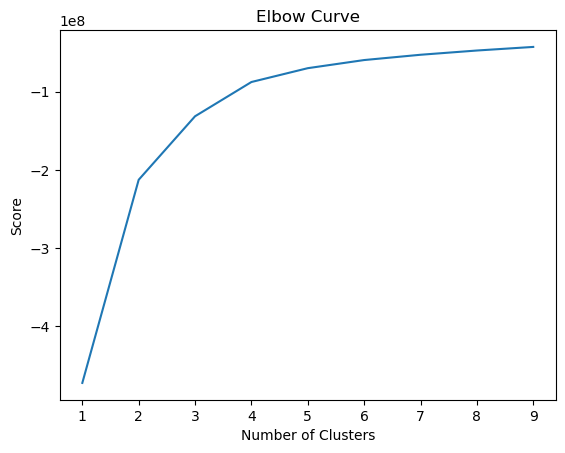

In [22]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#####  In this example, there's a large jump from two to four on the x-axis, but after that, the curve straightens out. This means that the optimal count for your clusters is four.

### 3. k-means clustering

In [23]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 4) 

In [24]:
# Fit the k-means object to the data.

kmeans.fit(df_clean)

C:\Users\ahamr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4)

In [25]:
df_clean['clusters'] = kmeans.fit_predict(df_clean)

C:\Users\ahamr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ahamr\AppData\Local\Temp\ipykernel_13084\3987554626.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['clusters'] = kmeans.fit_predict(df_clean)


In [26]:
df_clean.head()

,depth,magnitude,num_reported,station_gap,rms_amplitude,clusters
0,82.770,3.10,14.0,139.0,0.18,0
1,79.194,4.50,32.0,104.0,0.47,0
2,24.000,3.93,23.0,246.0,0.22,2
3,63.787,4.30,17.0,187.0,0.51,2
4,10.000,3.00,19.0,190.0,0.31,2


In [27]:
df_clean['clusters'].value_counts()

clusters
0    12243
2     6672
3     3168
1     1188
Name: count, dtype: int64

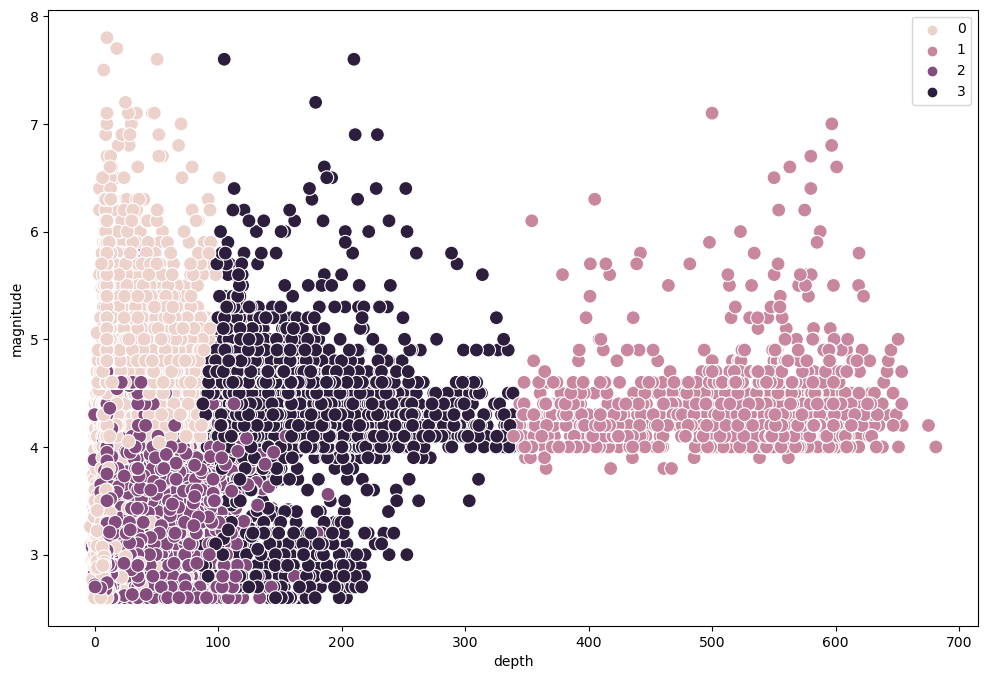

In [28]:
# Plot the clusters for the "magnitude" and "depth" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_clean['depth'], y=df_clean['magnitude'], hue=kmeans.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('depth') # Label x-axis.
plt.ylabel('magnitude') # Label y-axis.
plt.show()

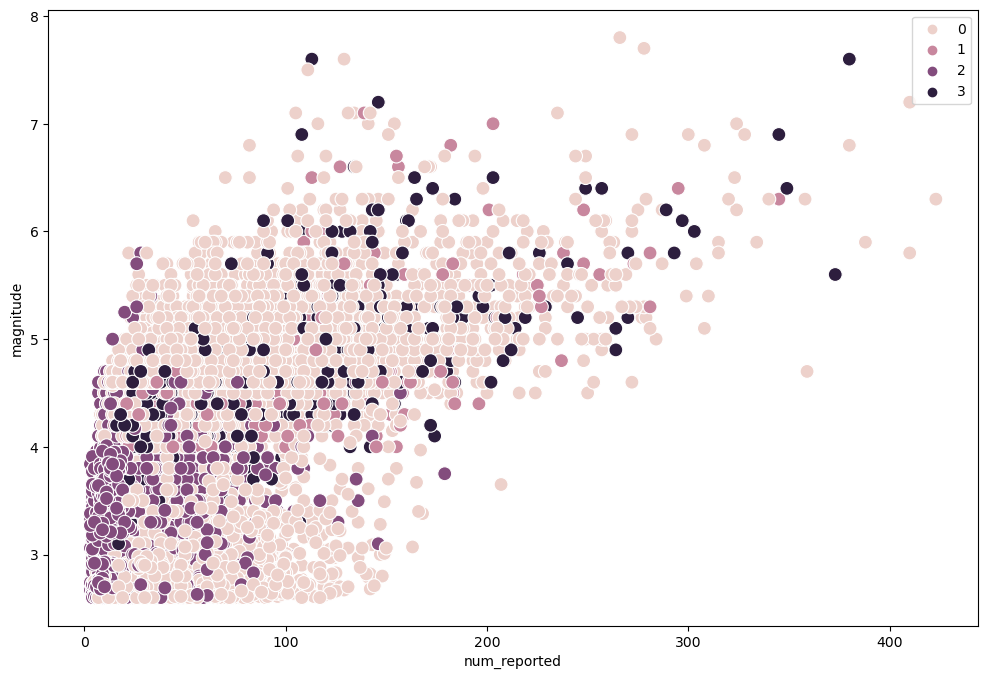

In [31]:
# Plot the clusters for the "magnitude" and "num_reported" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_clean['num_reported'], y=df_clean['magnitude'], hue=kmeans.labels_, s=100) 

ax.grid(False) 
plt.xlabel('num_reported') 
plt.ylabel('magnitude') 
plt.show()

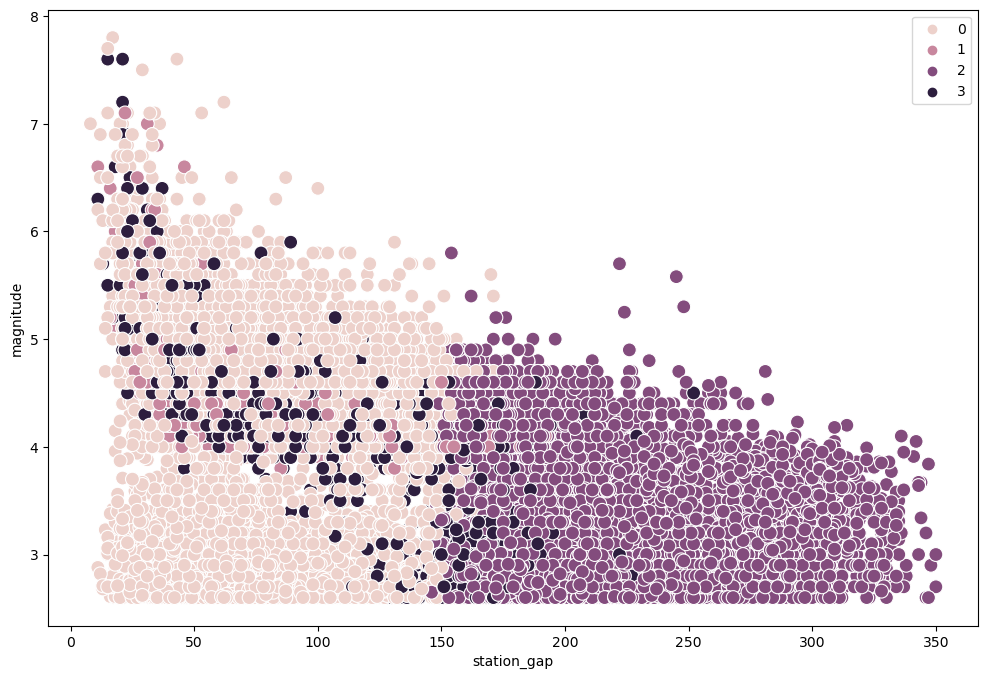

In [32]:
# Plot the clusters for the "magnitude" and "station_gap" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_clean['station_gap'], y=df_clean['magnitude'], hue=kmeans.labels_, s=100) 

ax.grid(False) 
plt.xlabel('station_gap') 
plt.ylabel('magnitude') 
plt.show()

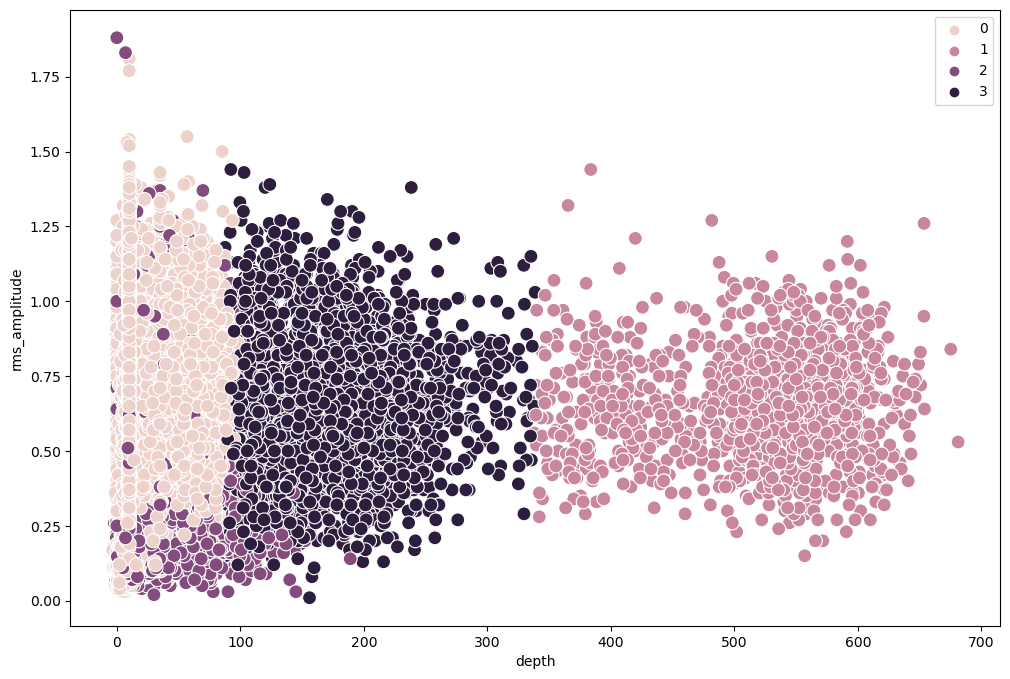

In [33]:
# Plot the clusters for the "rms_amplitude" and "depth" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_clean['depth'], y=df_clean['rms_amplitude'], hue=kmeans.labels_, s=100) 

ax.grid(False)
plt.xlabel('depth') 
plt.ylabel('rms_amplitude')
plt.show()

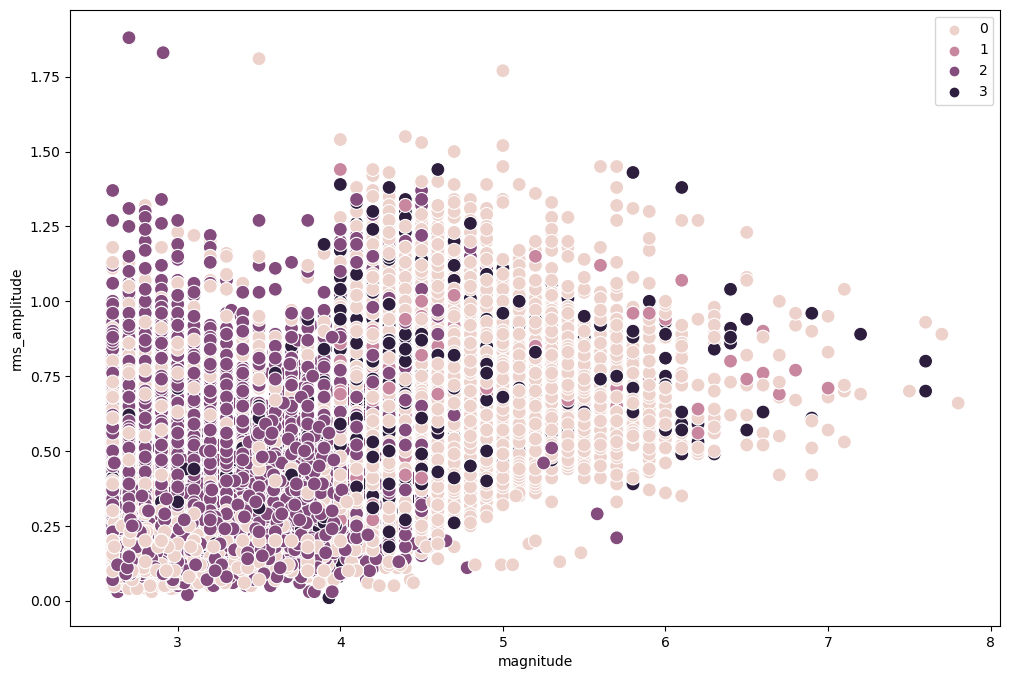

In [39]:
# Plot the clusters for the "rms_amplitude" and "magnitude" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_clean['magnitude'], y=df_clean['rms_amplitude'], hue=kmeans.labels_, s=100) 

ax.grid(False)
plt.xlabel('magnitude') 
plt.ylabel('rms_amplitude')
plt.show()

In [37]:
df_clean.loc[df_clean['clusters'] == 3, 'cluster'] = 'dark purple'
df_clean.loc[df_clean['clusters'] == 2, 'cluster'] = 'purple'
df_clean.loc[df_clean['clusters'] == 1, 'cluster'] = 'pink'
df_clean.loc[df_clean['clusters'] == 0, 'cluster'] = 'light pink'

In [38]:
df_clean.groupby('cluster').agg({'depth':['mean', 'median'],
                         'magnitude':['mean', 'median'], 
                         'num_reported':['mean', 'median'],
                          'station_gap':['mean', 'median'],
                         'rms_amplitude':['mean', 'median'], })

depth           magnitude        num_reported         \
                   mean    median      mean median         mean median   
cluster                                                                  
dark purple  158.367535  146.8965  4.267330    4.3    44.636048   31.5   
light pink    21.825629   10.0000  4.271936    4.4    52.153639   39.0   
pink         518.822939  536.0685  4.379882    4.3    52.088384   36.0   
purple        29.916065   24.4540  3.397903    3.2    21.938399   18.0   

            station_gap        rms_amplitude         
                   mean median          mean median  
cluster                                              
dark purple   97.814078   95.0      0.643378  0.630  
light pink    88.956411   88.0      0.597122  0.610  
pink          80.678451   80.0      0.647685  0.645  
purple       217.774604  212.0      0.465204  0.440

## Results:

1. After plotting the magnitude and depth of the earthquake we can see that if the depth is more than 200-300 the magnitude is always higher than 4.

2. After plotting the magnitude and the station gap, we can say that there are visually dominant 2 clusters. The gap in seismic station coverage may lead to delayed or ineffective warnings, as the system might not have sufficient data to accurately determine the earthquake's parameters. From our analysis, we can see that the biggest station gaps are of the earthquakes that are no higher magnitude than 5.

3. It very interesting was to analyze the depth and amplitude of earthquakes. 

Amplitude:
The amplitude of an earthquake refers to the maximum displacement or ground motion produced by the seismic waves at a specific location. It records the shaking of the Earth's surface during an earthquake.

Depth:
The depth of an earthquake is the distance from the Earth's surface to the earthquake's hypocenter, which is the point within the Earth where the seismic rupture initiates.

So, it is interesting to explore the relationship between these two seismic parameters. Looking at the scatterplot, we can see that even if we group the earthquakes with different depths, they all have different amplitude, so I cannot see any trend here. My suggestion here is that these parameters are influenced by different factors, like magnitude or local geological conditions.

4. And the last scatterplot shows us that is very hard to determine the groups or clusters of the earthquakes according to the magnitude and amplitude. And we prove here that they are distinct measurements that provide different information about the seismic event.